In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

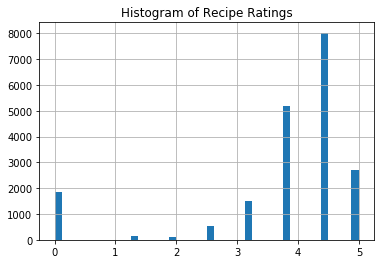

In [3]:
df.rating.hist(bins=40)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [4]:
df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [5]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [6]:
# Since over 75% of the data does have information for the nutritional value,
# we will drop the entries that lack this information.

df.dropna(inplace=True)
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,15864.000000,1.586400e+04,15864.000000,1.586400e+04,1.586400e+04,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,...,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000
mean,3.760952,6.350683e+03,100.324571,3.469868e+02,6.252742e+03,0.000378,0.000063,0.000946,0.001261,0.000441,...,0.001261,0.022504,0.000063,0.000315,0.014183,0.000126,0.000315,0.001324,0.000819,0.021243
std,1.285518,3.598484e+05,3843.462312,2.045933e+04,3.340421e+05,0.019445,0.007940,0.030736,0.035485,0.021002,...,0.035485,0.148320,0.007940,0.017751,0.118249,0.011228,0.017751,0.036360,0.028615,0.144198
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.990000e+02,3.000000,7.000000e+00,8.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.330000e+02,8.000000,1.700000e+01,2.960000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.872500e+02,27.000000,3.300000e+01,7.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


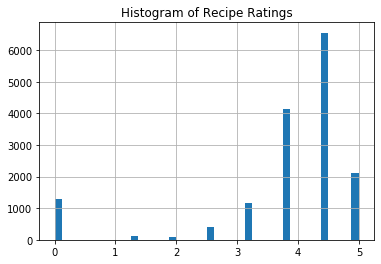

In [7]:
#After dropping these entries, the historgram has roughly the same shape as before

df.rating.hist(bins=40)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [8]:
# With no ratings at 3.5, for a SVM binary classifier we will use a rating of 3.5 as a divider between "good" and "bad" recipes.

df['rating_binary'] = 0.5*(np.sign(df['rating'] - 3.5) + 1)

In [9]:
df.drop(['rating'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15864 entries, 0 to 20051
Columns: 680 entries, title to rating_binary
dtypes: float64(679), object(1)
memory usage: 82.4+ MB


In [11]:
M = df.corr()

In [12]:
# Here are the variables with at least 0.4 correlation coefficient with the target; these will be our features.
# There are around 40 of them.

M = M['rating_binary']
M.dropna(inplace=True)
M = M.abs()
M = M.sort_values()
M = M.to_frame()
M = M[M['rating_binary'] >= 0.04]
M

,rating_binary
braise,0.040263
grill/barbecue,0.040273
goat cheese,0.040309
lime juice,0.040567
shrimp,0.040832
party,0.041037
3-ingredient recipes,0.041053
tea,0.041211
pickles,0.041734
vermouth,0.041937


In [13]:
A = M.index.values
A

array(['braise', 'grill/barbecue', 'goat cheese', 'lime juice', 'shrimp',
       'party', '3-ingredient recipes', 'tea', 'pickles', 'vermouth',
       'chartreuse', 'tree nut free', 'fruit juice', 'fortified wine',
       'soy free', 'tomato', 'thanksgiving', 'peanut free', 'liqueur',
       'weelicious', 'winter', 'low carb', 'créme de cacao', 'fall',
       'bake', 'condiment', 'non-alcoholic', 'roast', 'vegan', 'sauté',
       'rum', 'harpercollins', 'bitters', 'spirit', 'cocktail party',
       'cocktail', 'bon appétit', 'gin', 'house & garden', 'alcoholic',
       'drink', 'rating_binary'], dtype=object)

In [14]:
columns = ['braise', 'grill/barbecue', 'goat cheese', 'lime juice', 'shrimp',
       'party', '3-ingredient recipes', 'tea', 'pickles', 'vermouth',
       'chartreuse', 'tree nut free', 'fruit juice', 'fortified wine',
       'soy free', 'tomato', 'thanksgiving', 'peanut free', 'liqueur',
       'weelicious', 'winter', 'low carb', 'créme de cacao', 'fall',
       'bake', 'condiment', 'non-alcoholic', 'roast', 'vegan', 'sauté',
       'rum', 'harpercollins', 'bitters', 'spirit', 'cocktail party',
       'cocktail', 'bon appétit', 'gin', 'house & garden', 'alcoholic',
       'drink']

In [15]:
# SVM binary classifier

from sklearn.svm import SVC
X = df[columns].sample(frac=0.3, replace=True, random_state=1)
Y = df['rating_binary'].sample(frac=0.3, replace=True, random_state=1)
svm = SVC(kernel = 'linear')
svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
svm.score(X, Y)

0.815297331372137

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

array([0.81532004, 0.81197479, 0.80777311, 0.81072555, 0.8086225 ])

Not bad! (not great though)